In [1]:
import matplotlib
import matplotlib.colors as colors

matplotlib.__version__

'1.5.1'

# Section 2.2

In [2]:
from abelfunctions import *
R.<x,y> = QQ['x,y']; R

Multivariate Polynomial Ring in x, y over Rational Field

In [3]:
f2 = y^3 + 2*x^3*y - x^7
X2 = RiemannSurface(f2)
f4 = x^2*y^3 - x^4 + 1
X4 = RiemannSurface(f4)

# Section 2.2.1 - Puiseux Series

## Example 2.2.2

In [ ]:
P1, P2 = X2(0) # the places above x=0 on the surface
P1

In [ ]:
P1.puiseux_series.extend(14) # extend the curve to at least O(t^14) sage: P1
P1

In [ ]:
P2

In [ ]:
P2.puiseux_series.extend(13)
P2

In [ ]:
P = implicit_plot(f2, (x, -1.5, 1.5), (y, -1.5, 1.5), gridlines=True, linewidth=2, color='black')

P.show(
    legend_loc='lower_right',
    title='$f_2(x,y) = y^3 + 2x^3y - x^7 = 0$',
    axes_labels=('$x$', '$y$'),
    fontsize=16,
    dpi=150
)

In [ ]:
P1, P2 = X2(0)

t = P1.puiseux_series.t
P1x = P1.puiseux_series.xpart
P1y = P1.puiseux_series.ypart

P2x = P2.puiseux_series.xpart
P2y = P2.puiseux_series.ypart

P = implicit_plot(f2, (x, -1.5, 1.5), (y, -1.5, 1.5), gridlines=True, linewidth=2, color='black')
P += parametric_plot((P1x, P1y), (t, -1.3,1.3), thickness=5, linestyle='--', color='blue', legend_label='$P_1$')
P += parametric_plot((P2x, P2y), (t, -1.3,1.3), thickness=5, linestyle=':', color='green', legend_label='$P_2$')
P.set_legend_options(loc='lower right')


P.show(
    legend_loc='lower_right',
    title='$f_2(x,y) = y^3 + 2x^3y - x^7 = 0$',
    axes_labels=('$x$', '$y$'),
    fontsize=16,
    dpi=150
)

## Example 2.2.3

In [ ]:
P, = X4(0); P

In [ ]:
P.puiseux_series.extend(14); P

In [ ]:
P, = X4(0)

t = P.puiseux_series.t
Px = P.puiseux_series.xpart
Py = P.puiseux_series.ypart

plt = implicit_plot(f4, (x, -4.5, 4.5), (y, -4.5, 4.5), gridlines=True, linewidth=2, color='black')
plt += parametric_plot((Px, Py), (t, -1.5, -0.49), thickness=5, linestyle='--', color='blue', legend_label='$P_1$')
plt += parametric_plot((Px, Py), (t, 0.49, 1.5), thickness=5, linestyle='--', color='blue')
plt.set_legend_options(loc='lower right')


plt.show(
    legend_loc='lower_right',
    title='$f_4(x,y) = x^2y^3 - x^4 + 1 = 0$',
    axes_labels=('$x$', '$y$'),
    fontsize=16,
    dpi=150,
#    xmin=-4.5,
#    xmax=4.5,
#    ymin=-4.5,
#    ymax=4.5
)

# 2.2.2 Singularities

## Example

In [ ]:
S = singularities.singularities(f2)
for s, (m, delta, r) in S:
    print 'Singularity:', s
    print '\tmultiplicity     =', m
    print '\tdelta invariant  =', delta
    print '\tbranching number =', r

In [ ]:
singularities.genus(f2)

In [ ]:
S = singularities.singularities(f4)
for s, (m, delta, r) in S:
    print 'Singularity:', s
    print '\tmultiplicity     =', m
    print '\tdelta invariant  =', delta
    print '\tbranching number =', r

In [ ]:
f_ = (y^2-x^2)*(x-1)*(2*x-3) - 4*(x^2+y^2-2*x)^2

P = implicit_plot(f_, (x, -1, 3), (y, -1.5, 1.5), gridlines=True, linewidth=2, color='black')

P.show(
    legend_loc='lower_right',
    title='$f(x,y) = (y^2-x^2)(x-1)(2x-3) - 4(x^2+y^2-2x)^2$',
    axes_labels=('$x$', '$y$'),
    fontsize=16,
    dpi=150
)

In [ ]:
dfx = f_.derivative(x)
dfy = f_.derivative(y)

print('gradient:')
print(SR(dfx).simplify_rational())
print(SR(dfy).simplify_rational())

print('\ngradient at (1,-1)')
print(dfx(1,-1))
print(dfy(1,-1))

In [ ]:
S = singularities.singularities(f_)
for s, (m, delta, r) in S:
    print 'Singularity:', s
    print '\tmultiplicity     =', m
    print '\tdelta invariant  =', delta
    print '\tbranching number =', r

In [ ]:
f_.total_degree()

# 2.2.3 Analytic Continuation

In [4]:
f2_x2 = f2(x=2).univariate_polynomial()
roots = SR(f2_x2).roots()

for (r,m) in roots:
    show(r.simplify())

-2*I*sqrt(7) - 2

2*I*sqrt(7) - 2

4

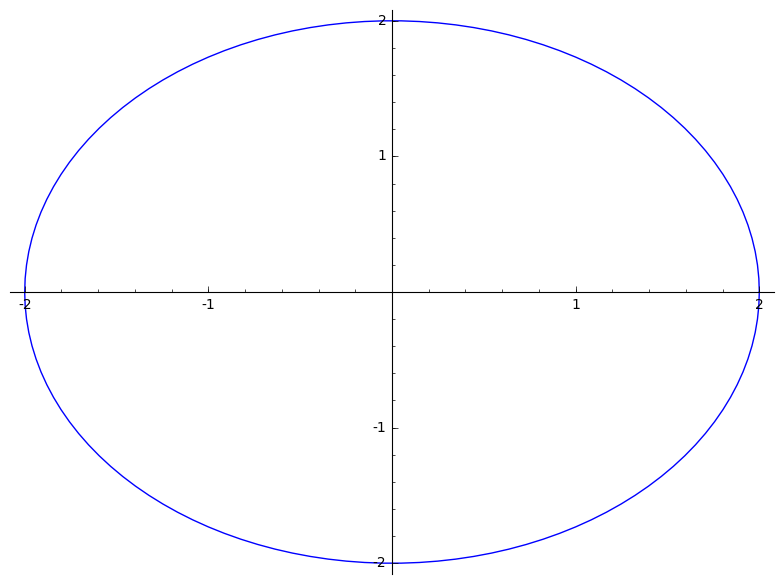

In [6]:
import abelfunctions
import numpy as np

gammax = (
    abelfunctions.complex_path_factory.ComplexArc(2, 0, 0, np.pi) +
    abelfunctions.complex_path_factory.ComplexArc(2, 0, np.pi, np.pi))
gammax.plot()

In [7]:
import numpy as np

X2 = RiemannSurface(f2)
y0 = [np.complex(root) for (root,multiplicity) in f2_x2.roots(CC)]

gamma = X2.path_factory.RiemannSurfacePath_from_complex_path(gammax, x0=2, y0=y0)
gamma

Path on the Riemann surface defined by f = -x^7 + 2*x^3*y + y^3 with x-projection Complex path from (2+0j) to (2-4.89858719659e-16j)

In [ ]:
gamma[2].plot_y()

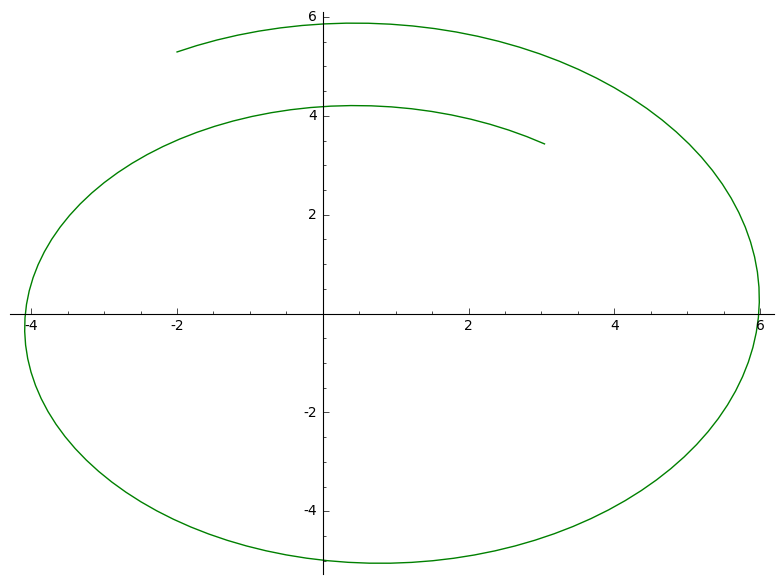

In [17]:
gamma[1].plot_y(color='green')

In [ ]:
gamma[2].plot_y(color='red')

# (Next Section)

In [ ]:
dfy.simplify_rational()

In [ ]:
omega = X4.holomorphic_differentials()

In [ ]:
C0 = omega[0].valuation_divisor()
for place, multiplicity in C0:
    print multiplicity, place

In [ ]:
C0.degree

In [ ]:
C1 = omega[1].valuation_divisor()
for place, multiplicity in C1:
    print multiplicity, place

In [ ]:
C1.degree

In [ ]:
C2 = omega[2].valuation_divisor()
for place, multiplicity in C2:
    print multiplicity, place

In [ ]:
C2.degree

In [ ]:
C3 = omega[3].valuation_divisor()
for place, multiplicity in C3:
    print multiplicity, place

In [ ]:
C3.degree

In [ ]:
a2 = X2.a_cycles()
b2 = X2.b_cycles()

a2[0].plot_x(512, color='blue', thickness=2)

In [ ]:
a2[0].plot_y(512, color='green', thickness=2)

In [ ]:
a4 = X4.a_cycles()
b4 = X4.b_cycles()

a4[0].plot_x(512, color='blue', thickness=2)

In [ ]:
a4[0].plot_y(512, color='green', thickness=2)